In [1]:
import sys
sys.path.append('/home/ardelalegre/SoundMapping/Analysis/Util')
sys.path.append('/home/ardelalegre/SoundMapping/Database')
from DatabaseAPI import DatabaseAPI
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from get_time_interval_data import *
from PCA import *
from Plot import *
import pickle
from sklearn.cluster import KMeans

In [14]:
# only clean out NaNs
def extract_all_active_observations(interval_matrix_data, array_indices):
    # exclude time column
    observations = interval_matrix_data[:,1:]
    selected_obs = np.hstack([observations[:,i*3:i*3+3] for i in array_indices])
    cleaned_data = []
    ind = []
    for i in range(selected_obs.shape[0]):
        if not any(np.isnan(selected_obs[i,:])):
            cleaned_data.append(selected_obs[i,:])
            ind.append(i)
    selected_raw_obs = interval_matrix_data[ind,:]        
    return  np.vstack(cleaned_data), selected_raw_obs

In [51]:
# clean out NaNs and zeros
def extract_all_active_observations_v2(interval_matrix_data, array_indices):
    # exclude time column
    observations = interval_matrix_data[:,1:]
    selected_obs = np.hstack([observations[:,i*3:i*3+3] for i in array_indices])
    cleaned_data = []
    ind = []
    for i in range(selected_obs.shape[0]):
        if not any(np.isnan(selected_obs[i,:])) and not any(selected_obs[i,:]==0):
            cleaned_data.append(selected_obs[i,:])
            ind.append(i)
    selected_raw_obs = interval_matrix_data[ind,:]        
    return  np.vstack(cleaned_data), selected_raw_obs

## note
Different from previous static point experiments, two arrays are mounted onto the wall: array 0 and 1, and array 2, 3, 5 are mounted to the ceiling. 

In [4]:
chair2 = get_time_interval_matrix_data("Dec 18 2020 03:40PM", "Dec 18 2020 03:44PM")
chair3 = get_time_interval_matrix_data("Dec 18 2020 03:45PM", "Dec 18 2020 03:49PM")
chair4 = get_time_interval_matrix_data("Dec 18 2020 03:50PM", "Dec 18 2020 03:54PM")
chair5 = get_time_interval_matrix_data("Dec 18 2020 03:55PM", "Dec 18 2020 03:59PM")
chair1 = get_time_interval_matrix_data("Dec 18 2020 04:00PM", "Dec 18 2020 04:04PM")
static_point_data = np.vstack([chair2, chair3, chair4, chair5, chair1])
static_point_cdata = get_cdata(static_point_data)
projections = project_to_eigen_vectors(static_point_cdata, 2, EIGEN_VALUES_0819, EIGEN_VECTORS_0819)

## projection with uncleaned data

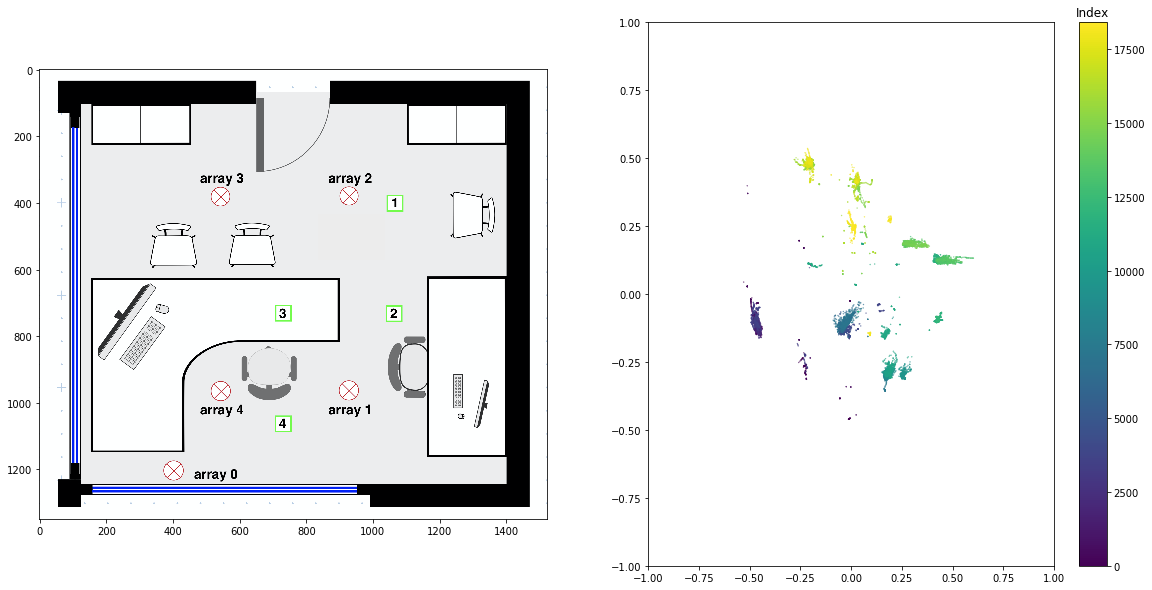

In [5]:
fig = plt.figure(figsize = [20,10])

ax2 = fig.add_subplot(121)
room_model_chair = plt.imread('room_model_v4.png')
ax2.imshow(room_model_chair)

ax = fig.add_subplot(122)
temp = ax.scatter(projections[:,0], projections[:,1], c = np.arange(projections.shape[0]), s=0.1)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
cbar = fig.colorbar(temp, ax=ax)
cbar.ax.set_title('Index')

plt.show()

### uncleaned data time series

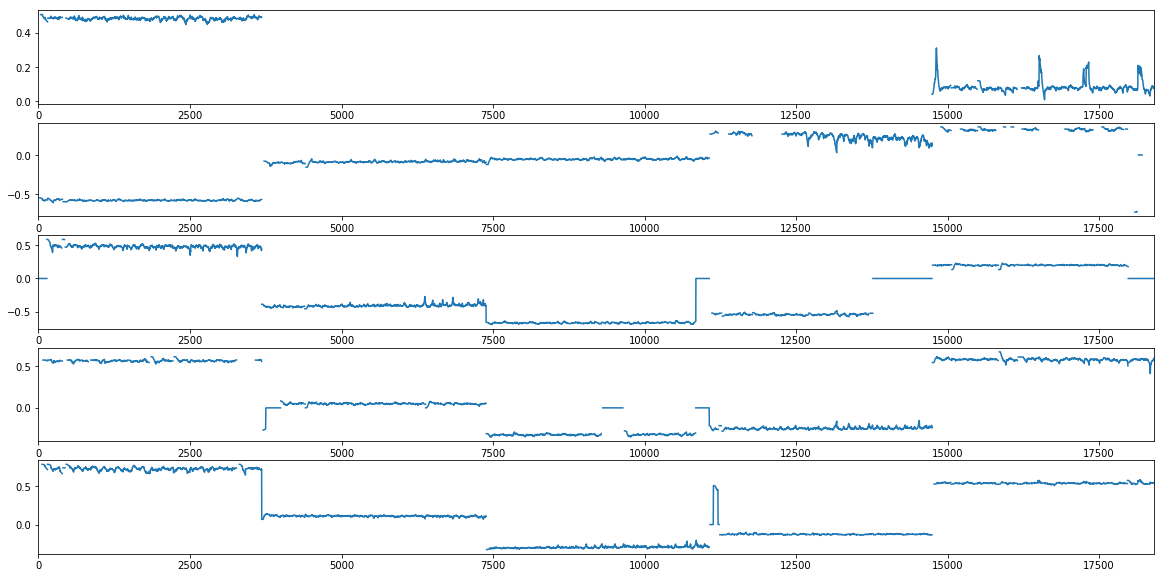

In [12]:
# only plotting x
fig = plt.figure(figsize = [20,10])
ax1 = fig.add_subplot(511)
ax1.plot(static_point_data[:,1])  # array 0
ax1.set_xlim(0,18412)
ax2 = fig.add_subplot(512)
ax2.plot(static_point_data[:,4])  # array 1
ax2.set_xlim(0,18412)
ax3 = fig.add_subplot(513)
ax3.plot(static_point_data[:,7])  # array 2
ax3.set_xlim(0,18412)
ax4 = fig.add_subplot(514)
ax4.plot(static_point_data[:,10]) # array 3
ax4.set_xlim(0,18412)
ax5 = fig.add_subplot(515)
ax5.plot(static_point_data[:,16]) # array 5
ax5.set_xlim(0,18412)
plt.show()

- Array 0 has recordings of only two locations. Data at chair 3, 4, 5 from array 0 will be discarded. 
- Array 1 has uncontinuous recordings at chair 1. Data at chair 1 from array 1 will be discarded

### extract all active observations (no NaN)

In [16]:
chair2_cleaned, chair2_og = extract_all_active_observations(chair2, [0,1,2,3,5])
chair3_cleaned, chair3_og = extract_all_active_observations(chair3, [1,2,3,5])
chair4_cleaned, chair4_og = extract_all_active_observations(chair4, [1,2,3,5])
chair5_cleaned, chair5_og = extract_all_active_observations(chair5, [1,2,3,5])
chair1_cleaned, chair1_og = extract_all_active_observations(chair1, [0,2,3,5])

### statistics

In [23]:
# the percentage of the observations where all arrays were active
chair2_ratio = chair2_cleaned.shape[0]/chair2.shape[0]
chair3_ratio = chair3_cleaned.shape[0]/chair3.shape[0]
chair4_ratio = chair4_cleaned.shape[0]/chair4.shape[0]
chair5_ratio = chair5_cleaned.shape[0]/chair5.shape[0]
chair1_ratio = chair1_cleaned.shape[0]/chair1.shape[0]
clean_total = chair2_cleaned.shape[0] + chair3_cleaned.shape[0] + chair4_cleaned.shape[0] + chair5_cleaned.shape[0] + chair1_cleaned.shape[0]
overall_ratio = clean_total/static_point_data.shape[0]

In [24]:
table = {'chair2': chair2_ratio, 
         'chair3': chair3_ratio, 
         'chair4': chair4_ratio, 
         'chair5': chair5_ratio,
         'chair1': chair1_ratio,
         'Overall': overall_ratio}

In [25]:
table

{'Overall': 0.9118509667608081,
 'chair1': 0.9547683923705722,
 'chair2': 0.8414336139017106,
 'chair3': 0.9832522960561858,
 'chair4': 0.9837045084193373,
 'chair5': 0.7956462585034013}

## projection with all real data (no NaN)

In [26]:
selected_og = np.vstack([chair2_og, chair3_og, chair4_og, chair5_og, chair1_og])
# Need to Nan out data from array 1 at chair 1
# ...

In [27]:
selected_cdata = get_cdata(selected_og)
projections_selected = project_to_eigen_vectors(selected_cdata, 2, EIGEN_VALUES_0819, EIGEN_VECTORS_0819)

/home/ardelalegre/SoundMapping/Analysis/Util/PCA.py:43: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(data[:,1:],axis = 0,keepdims = True)


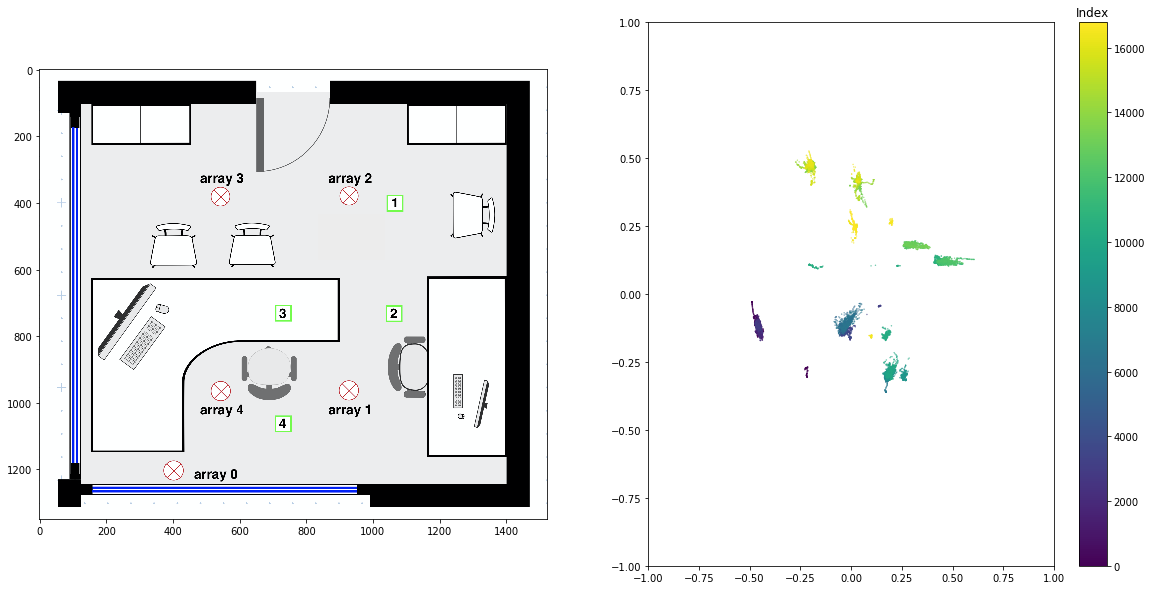

In [34]:
fig = plt.figure(figsize = [20,10])

ax2 = fig.add_subplot(121)
room_model_chair = plt.imread('room_model_v4.png')
ax2.imshow(room_model_chair)

ax = fig.add_subplot(122)
temp = ax.scatter(projections_selected[:,0], 
                  projections_selected[:,1], 
                  c = np.arange(projections_selected.shape[0]), 
                  s=0.1)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
cbar = fig.colorbar(temp, ax=ax)
cbar.ax.set_title('Index')

plt.show()

### no NaN data time series

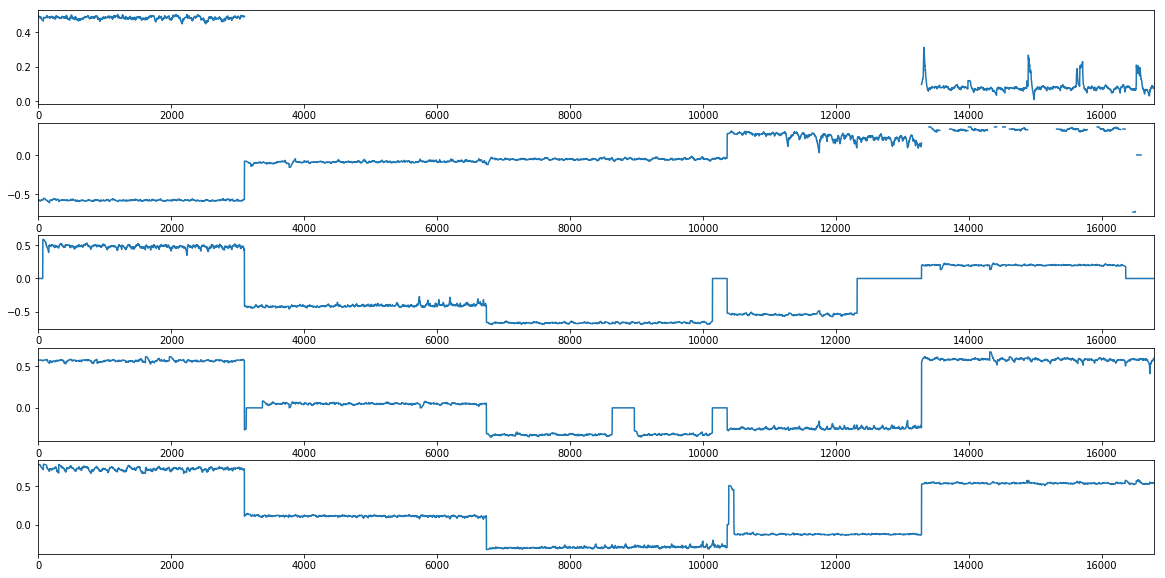

In [63]:
# only plotting x
fig = plt.figure(figsize = [20,10])
ax1 = fig.add_subplot(511)
ax1.plot(selected_og[:,1])  # array 0
ax1.set_xlim(0,16789)
ax2 = fig.add_subplot(512)
ax2.plot(selected_og[:,4])  # array 1
ax2.set_xlim(0,16789)
ax3 = fig.add_subplot(513)
ax3.plot(selected_og[:,7])  # array 2
ax3.set_xlim(0,16789)
ax4 = fig.add_subplot(514)
ax4.plot(selected_og[:,10]) # array 3
ax4.set_xlim(0,16789)
ax5 = fig.add_subplot(515)
ax5.plot(selected_og[:,16]) # array 5
ax5.set_xlim(0,16789)
plt.show()

**I suspect that zeros in the time series are causing the splitting images**

### extract all active observations (no NaN, no zeros)

In [52]:
chair2_cleaned_v2, chair2_og_v2 = extract_all_active_observations_v2(chair2, [0,1,2,3,5])
chair3_cleaned_v2, chair3_og_v2 = extract_all_active_observations_v2(chair3, [1,2,3,5])
chair4_cleaned_v2, chair4_og_v2 = extract_all_active_observations_v2(chair4, [1,2,3,5])
chair5_cleaned_v2, chair5_og_v2 = extract_all_active_observations_v2(chair5, [1,2,3,5])
chair1_cleaned_v2, chair1_og_v2 = extract_all_active_observations_v2(chair1, [0,2,3,5])

### statistics

In [57]:
# the percentage of the observations where all arrays were active and not zero
chair2_ratio_v2 = chair2_cleaned_v2.shape[0]/chair2.shape[0]
chair3_ratio_v2 = chair3_cleaned_v2.shape[0]/chair3.shape[0]
chair4_ratio_v2 = chair4_cleaned_v2.shape[0]/chair4.shape[0]
chair5_ratio_v2 = chair5_cleaned_v2.shape[0]/chair5.shape[0]
chair1_ratio_v2 = chair1_cleaned_v2.shape[0]/chair1.shape[0]
clean_total_v2 = np.sum([chair2_cleaned_v2.shape[0],
                         chair3_cleaned_v2.shape[0],
                         chair4_cleaned_v2.shape[0],
                         chair5_cleaned_v2.shape[0],
                         chair1_cleaned_v2.shape[0]])
overall_ratio_v2 = clean_total_v2/static_point_data.shape[0]

In [58]:
table = {'chair2': chair2_ratio_v2, 
         'chair3': chair3_ratio_v2, 
         'chair4': chair4_ratio_v2, 
         'chair5': chair5_ratio_v2,
         'chair1': chair1_ratio_v2,
         'Overall': overall_ratio_v2}

In [59]:
table

{'Overall': 0.7866608733434717,
 'chair1': 0.8370572207084469,
 'chair2': 0.8237849579147434,
 'chair3': 0.9138303619665046,
 'chair4': 0.8324280282455188,
 'chair5': 0.5251700680272109}

## projection with all real data (no NaN, no zeros)

In [67]:
chair1_og_v2.shape

(3072, 19)

In [75]:
selected_og_v2 = np.vstack([chair2_og_v2, chair3_og_v2, chair4_og_v2, chair5_og_v2, chair1_og_v2])
# Need to Nan out data from array 1 at chair 1
selected_og_v2[-3072:,4:7] = np.NaN

In [77]:
selected_cdata_v2 = get_cdata(selected_og_v2)
projections_selected_v2 = project_to_eigen_vectors(selected_cdata_v2, 2, EIGEN_VALUES_0819, EIGEN_VECTORS_0819)

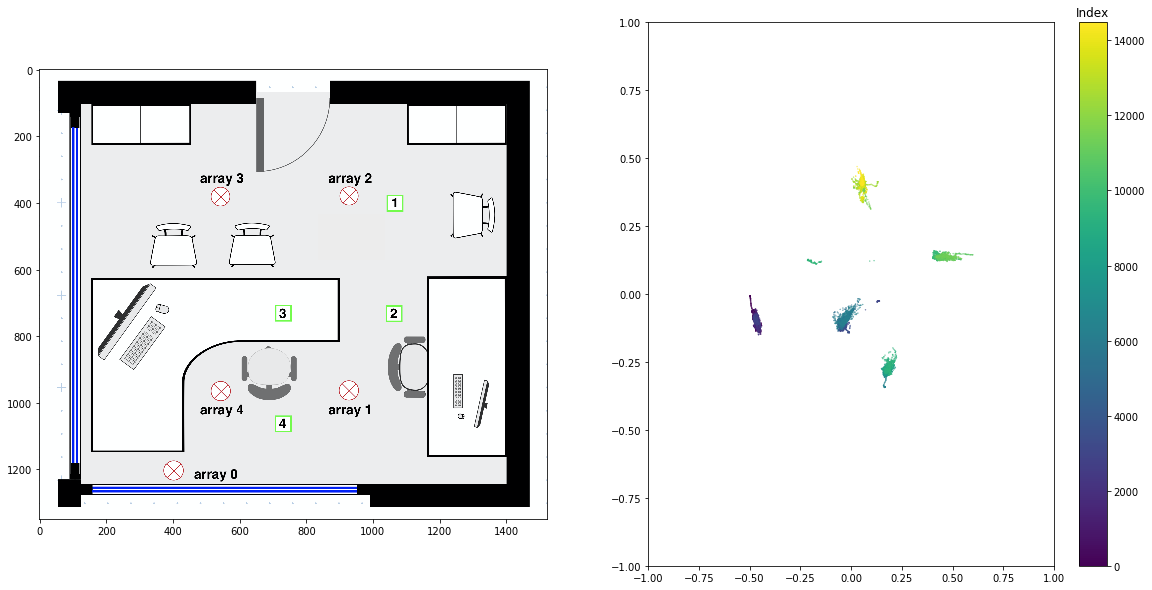

In [78]:
fig = plt.figure(figsize = [20,10])

ax2 = fig.add_subplot(121)
room_model_chair = plt.imread('room_model_v4.png')
ax2.imshow(room_model_chair)

ax = fig.add_subplot(122)
temp = ax.scatter(projections_selected_v2[:,0], 
                  projections_selected_v2[:,1], 
                  c = np.arange(projections_selected_v2.shape[0]), 
                  s=0.1)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
cbar = fig.colorbar(temp, ax=ax)
cbar.ax.set_title('Index')

plt.show()

### no NaN, no zeros data time series

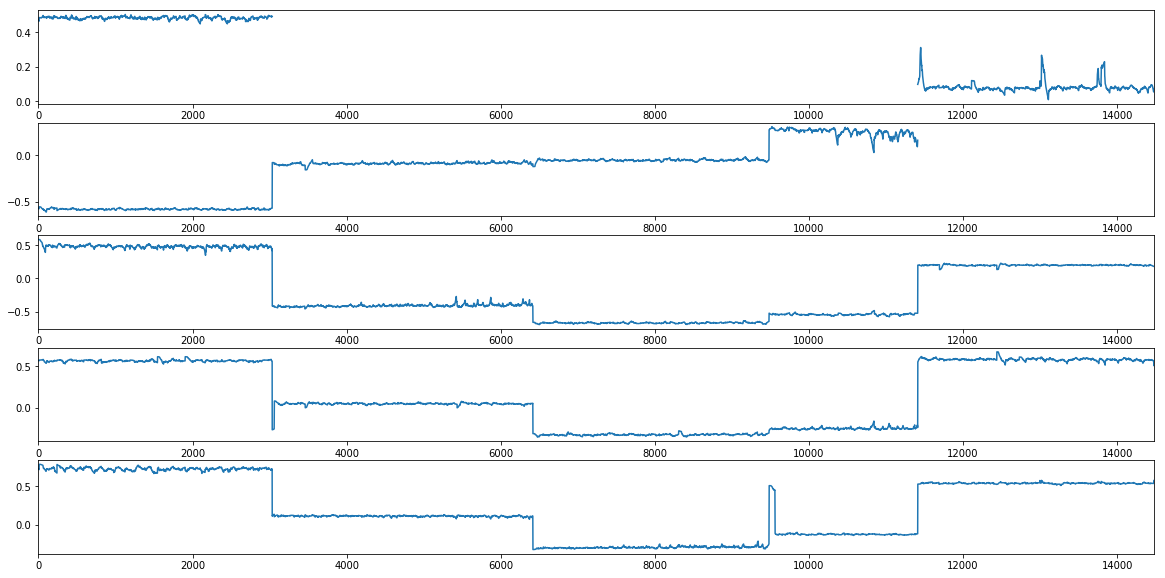

In [76]:
# only plotting x
fig = plt.figure(figsize = [20,10])
ax1 = fig.add_subplot(511)
ax1.plot(selected_og_v2[:,1])  # array 0
ax1.set_xlim(0,14484)
ax2 = fig.add_subplot(512)
ax2.plot(selected_og_v2[:,4])  # array 1
ax2.set_xlim(0,14484)
ax3 = fig.add_subplot(513)
ax3.plot(selected_og_v2[:,7])  # array 2
ax3.set_xlim(0,14484)
ax4 = fig.add_subplot(514)
ax4.plot(selected_og_v2[:,10]) # array 3
ax4.set_xlim(0,14484)
ax5 = fig.add_subplot(515)
ax5.plot(selected_og_v2[:,16]) # array 5
ax5.set_xlim(0,14484)
plt.show()

## Conclusion

Discontinuous recording and zero values are the cause of splitting image in the PCA space. Since PCA projection is a linear operation. Wherever recording becomes discontinuous, the missing observations are then filled with NaNs, leading to a different sum. The same effect takes place when the observation value is zero.